plotting...


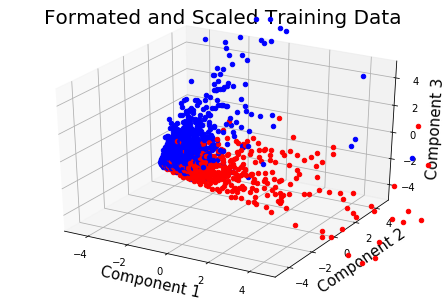

plotting...


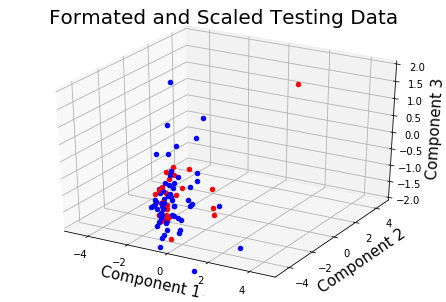

In [3]:
#Name: CS 458 Task 1 Training and Testing Data 3D Plots
#Authors: Liliana Pacheco, Chantelle Suarez, Yan Tarpley
#Date: December 9, 2019
#Description: This code takes in the Training.txt file and the test_sample.txt and then processecs the data into 
#a new format and then processes the formatted data using PCA. With PCA the data's dimensionality is reduced to 
#two main components using this newly processed data the two main components are then plotted onto a 2D scatter plot

# Load libraries
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')


trainingNames = ['info ID', 'ft ID', 'val']
labelNames = ['label']
#----------------------------------------------------------------------------------------------#
#                                 May Change File Paths Here                                   #

#Load Training Data
trainingFile = open(r"C:\Users\lilia_fdv6j62\Documents\training.txt","r+")

#Load Training Data Labels
trainingLabelFile = open(r"C:\Users\lilia_fdv6j62\Documents\label_training.txt", 'r+')

#Load Testing Data -- excel sheet
testDataDF = pd.read_excel(r"C:\Users\lilia_fdv6j62\Documents\test_sample.xlsx", sheet_name="data", names=trainingNames, header=None)

#Load Testing Data Labels -- excel sheet
testingLabel = pd.read_excel(r"C:\Users\lilia_fdv6j62\Documents\test_sample.xlsx", sheet_name="label", names=labelNames, header=None)

#----------------------------------------------------------------------------------------------#


# Load dataset
trainingDF = pd.read_csv(trainingFile, delimiter=" ", names=trainingNames)
trainingData = pd.pivot_table(trainingDF, index=['info ID'], columns=['ft ID'], values=['val'])
trainingData.fillna(0, inplace=True)

#Load Training Labels
trainingLabelDF = pd.read_csv(trainingLabelFile, delimiter=" ", names=labelNames)

#Merge Trainning Data and Training Labels
trainingLabelDF.insert(0, 'info ID', range(1, len(trainingLabelDF) + 1))
trainingMerge = pd.merge(trainingLabelDF, trainingData, on="info ID")
cols = list(trainingMerge.columns.to_numpy())
trainingLabelCol = trainingMerge.pop('label')
trainingMerge['label'] = trainingLabelCol

features = list(trainingMerge.columns)
target = features.pop()

x = trainingMerge.loc[:, features].values
y = trainingMerge.loc[:,['label']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data=principalComponents, columns = ['1', '2', '3'])
finalDF = pd.concat([principalDF, trainingMerge[['label']]], axis=1)

xaxis = finalDF.pop('1').to_numpy()
yaxis = finalDF.pop('2').to_numpy()
zaxis = finalDF.pop('3').to_numpy()
color = finalDF.pop('label').to_numpy()

print("plotting...")
figure = plt.figure()
ax = Axes3D(figure)
for i in range(len(x)):
    if(color[i] == 1):
        ax.scatter(xaxis[i], yaxis[i], zaxis[i], color='blue')
    else:
        ax.scatter(xaxis[i], yaxis[i], zaxis[i], color='red')

ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)

ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_zlabel('Component 3', fontsize = 15)
ax.set_title('Formated and Scaled Training Data', fontsize = 20)        
plt.show()

#Load Testing Data -- excel sheet
testingData = pd.pivot_table(testDataDF, index=['info ID'], columns=['ft ID'], values=['val'])
testingData.fillna(0, inplace=True)

#Merge Testing Data and Testing Labels
testingLabel.insert(0, 'info ID', range(1, len(testingLabel) + 1))
testingMerge = pd.merge(testingLabel, testingData, on="info ID")
cols = list(testingMerge.columns.to_numpy())
testingLabelCol = testingMerge.pop('label')
testingMerge['label'] = testingLabelCol

testFeatures = list(testingMerge.columns)
testTarget = testFeatures.pop()

testx = testingMerge.loc[:, testFeatures].values
testy = testingMerge.loc[:,['label']].values
testx = StandardScaler().fit_transform(testx)

numComponents = 3
testpca = PCA(n_components=numComponents)
testPrincipalComponents = testpca.fit_transform(testx)
testPrincipalDF = pd.DataFrame(data=testPrincipalComponents, columns =['1', '2', '3'])
testFinalDF = pd.concat([testPrincipalDF, testingMerge[['label']]], axis=1)

xaxis = testFinalDF.pop('1').to_numpy()
yaxis = testFinalDF.pop('2').to_numpy()
zaxis = testFinalDF.pop('3').to_numpy()
color = testFinalDF.pop('label').to_numpy()

print("plotting...")
figure2 = plt.figure()
ax2 = Axes3D(figure2)
for i in range(len(xaxis)):
    if(color[i] == 1):
        ax2.scatter(xaxis[i], yaxis[i], zaxis[i], color='blue')
    else:
        ax2.scatter(xaxis[i], yaxis[i], zaxis[i], color='red')

ax2.set_xlim3d(-5,5)
ax2.set_ylim3d(-5,5)
ax2.set_zlim3d(-2,2)
ax2.set_xlabel('Component 1', fontsize = 15)
ax2.set_ylabel('Component 2', fontsize = 15)
ax2.set_zlabel('Component 3', fontsize = 15)
ax2.set_title('Formated and Scaled Testing Data', fontsize = 20)
        
plt.show()
